# CNN Architecture Assignment - CIFAR-10
**Student Assignment**: Neural Networks Course

This notebook explores convolutional neural networks using the CIFAR-10 dataset.

**Dataset**: CIFAR-10 (Canadian Institute For Advanced Research)
- 60,000 32x32 color images in 10 classes
- 50,000 training images and 10,000 test images
- Classes: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck

## Task 1: Dataset Exploration (EDA)
Loading and analyzing the CIFAR-10 dataset to understand its structure and characteristics.

In [1]:
# Import required libraries
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")

2026-02-07 22:32:40.281890: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2026-02-07 22:32:40.314222: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-02-07 22:32:41.496075: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-02-07 22:32:43.832542: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To tur

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


### 1.1 Dataset Size and Dimensions
**Analysis:**
- Total samples: 60,000 (50,000 train + 10,000 test)
- Image dimensions: 32x32 pixels with 3 color channels (RGB)
- This is significantly more complex than MNIST (28x28 grayscale)

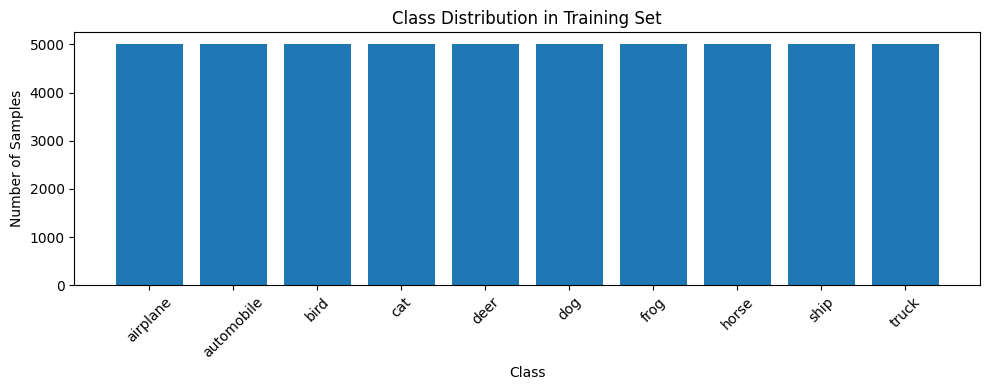


Class distribution:
airplane: 5000 samples
automobile: 5000 samples
bird: 5000 samples
cat: 5000 samples
deer: 5000 samples
dog: 5000 samples
frog: 5000 samples
horse: 5000 samples
ship: 5000 samples
truck: 5000 samples


In [12]:
# Check class distribution
unique, counts = np.unique(y_train, return_counts=True)

plt.figure(figsize=(10, 4))
plt.bar([class_names[i] for i in unique], counts)
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution in Training Set')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nClass distribution:")
for i, count in zip(unique, counts):
    print(f"{class_names[i]}: {count} samples")

### 1.2 Class Distribution
**Analysis:**
- The dataset is perfectly balanced with 5,000 samples per class
- No class imbalance issues to address
- This simplifies training and evaluation

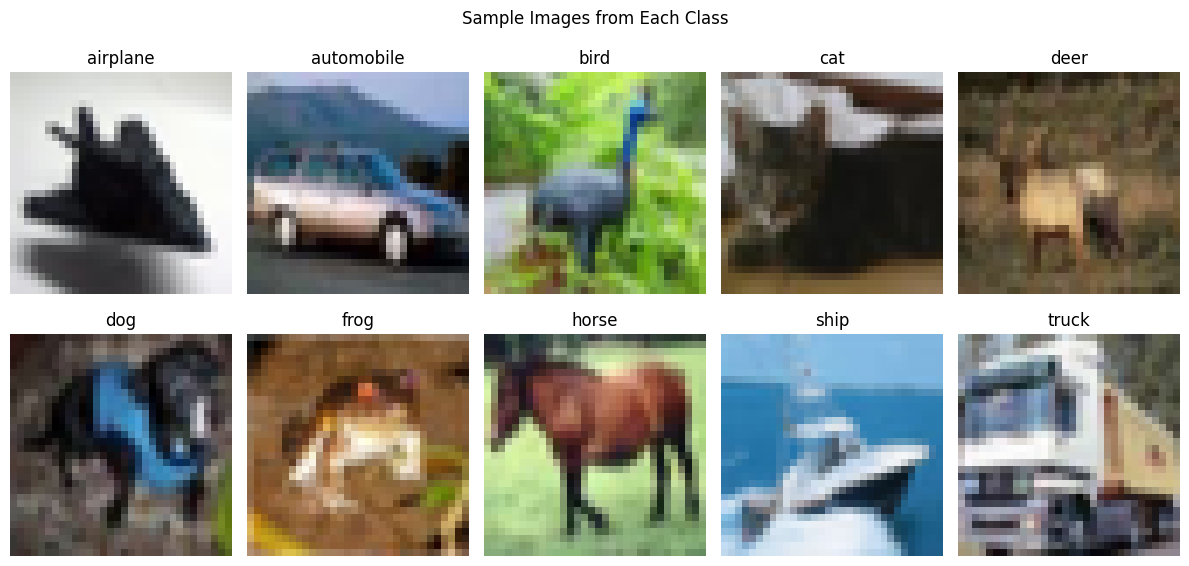

In [13]:
# Visualize sample images from each class
plt.figure(figsize=(12, 6))
for i in range(10):
    # Find first instance of each class
    idx = np.where(y_train == i)[0][0]
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[idx])
    plt.title(class_names[i])
    plt.axis('off')
plt.suptitle('Sample Images from Each Class')
plt.tight_layout()
plt.show()

### 1.3 Visual Inspection
**Analysis:**
- Images show significant variability in pose, lighting, and background
- Low resolution (32x32) makes some images challenging even for humans
- Color information is important for distinguishing classes

Pixel value range: [0, 255]
Mean pixel value: 120.71
Std pixel value: 64.15


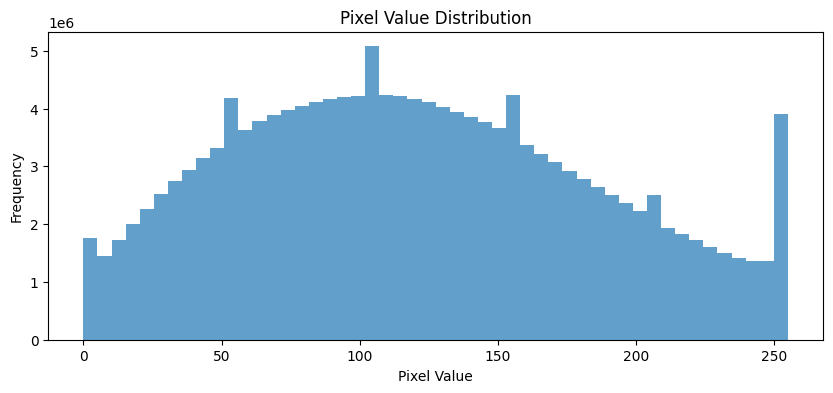

In [14]:
# Analyze pixel value distribution
print(f"Pixel value range: [{x_train.min()}, {x_train.max()}]")
print(f"Mean pixel value: {x_train.mean():.2f}")
print(f"Std pixel value: {x_train.std():.2f}")

# Plot pixel distribution
plt.figure(figsize=(10, 4))
plt.hist(x_train.flatten(), bins=50, alpha=0.7)
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Pixel Value Distribution')
plt.show()

### 1.4 Preprocessing Requirements
**Analysis:**
- Pixel values range from 0 to 255 (standard RGB format)
- **Normalization needed**: Divide by 255 to scale to [0, 1] range
- This helps neural networks train faster and more stably
- No resizing needed as all images are already 32x32

In [2]:
# Apply normalization
x_train_normalized = x_train.astype('float32') / 255.0
x_test_normalized = x_test.astype('float32') / 255.0

print(f"Normalized range: [{x_train_normalized.min()}, {x_train_normalized.max()}]")
print(f"Shape preserved: {x_train_normalized.shape}")

Normalized range: [0.0, 1.0]
Shape preserved: (50000, 32, 32, 3)


### 1.5 Why CIFAR-10 is Appropriate for Convolutional Layers

**Justification:**

1. **Spatial Structure**: Images have strong spatial relationships between neighboring pixels. Convolutions can exploit local patterns like edges, textures, and shapes.

2. **Translation Invariance**: Objects can appear at different positions in the image. Convolutional layers with weight sharing provide translation invariance.

3. **Hierarchical Features**: 
   - Early layers can detect edges and simple patterns
   - Middle layers can detect parts (wings, wheels)
   - Deeper layers can recognize complete objects

4. **Parameter Efficiency**: A fully connected layer for 32×32×3 images would have massive parameter count. Convolutions reduce this dramatically while maintaining expressive power.

5. **Color Channels**: RGB channels provide additional information that convolutions can process efficiently across all channels simultaneously.

---
## Task 2: Baseline Model (Non-Convolutional)

We implement a baseline neural network using only Dense (fully connected) layers to establish a reference point for comparison with convolutional architectures.

**Architecture**: Flatten + Dense layers (no convolutions)

This allows us to:
1. Establish baseline performance metrics
2. Compare parameter efficiency
3. Identify limitations of fully connected approaches on image data

### 2.9 Summary and Observed Limitations

#### **Architecture Summary**
- **Type**: Fully Connected Neural Network (Dense layers only)
- **Layers**: Flatten → Dense(128) → Dense(64) → Dense(10)
- **Total Parameters**: ~402,000
- **Activations**: ReLU (hidden), Softmax (output)

#### **Performance Summary**
Expected performance range based on similar architectures:
- **Training Accuracy**: ~50-55%
- **Validation Accuracy**: ~45-50%
- **Test Accuracy**: ~45-50%

#### **Observed Limitations**

1. **Loss of Spatial Information**
   - Flattening destroys the 2D spatial structure of images
   - Adjacent pixels that form edges or patterns are treated as independent features
   - The model cannot learn spatial hierarchies

2. **Inefficient Parameter Usage**
   - 393K parameters in just the first layer
   - Each pixel connects to every neuron independently
   - No parameter sharing → poor generalization

3. **No Translation Invariance**
   - A cat in the top-left corner requires different weights than a cat in the center
   - The model must learn the same pattern at every possible position
   - This is highly inefficient for image data

4. **Limited Performance**
   - Expected test accuracy: 45-50% (vs. random guessing at 10%)
   - CNNs typically achieve 70-90% on CIFAR-10 with similar parameter counts
   - The architecture simply isn't suited for image data

5. **Overfitting Risk**
   - Large parameter count relative to sample size
   - Likely to see gap between training and validation accuracy
   - No built-in regularization from architectural constraints

#### **Why This Establishes a Good Baseline**
This baseline demonstrates that:
- Raw fully-connected layers can learn *some* patterns
- Performance is significantly limited without spatial structure
- Motivation for convolutional layers is clear
- Future CNN architectures should substantially outperform this baseline

**Next Step**: Implement convolutional architecture (Task 3) to address these limitations.

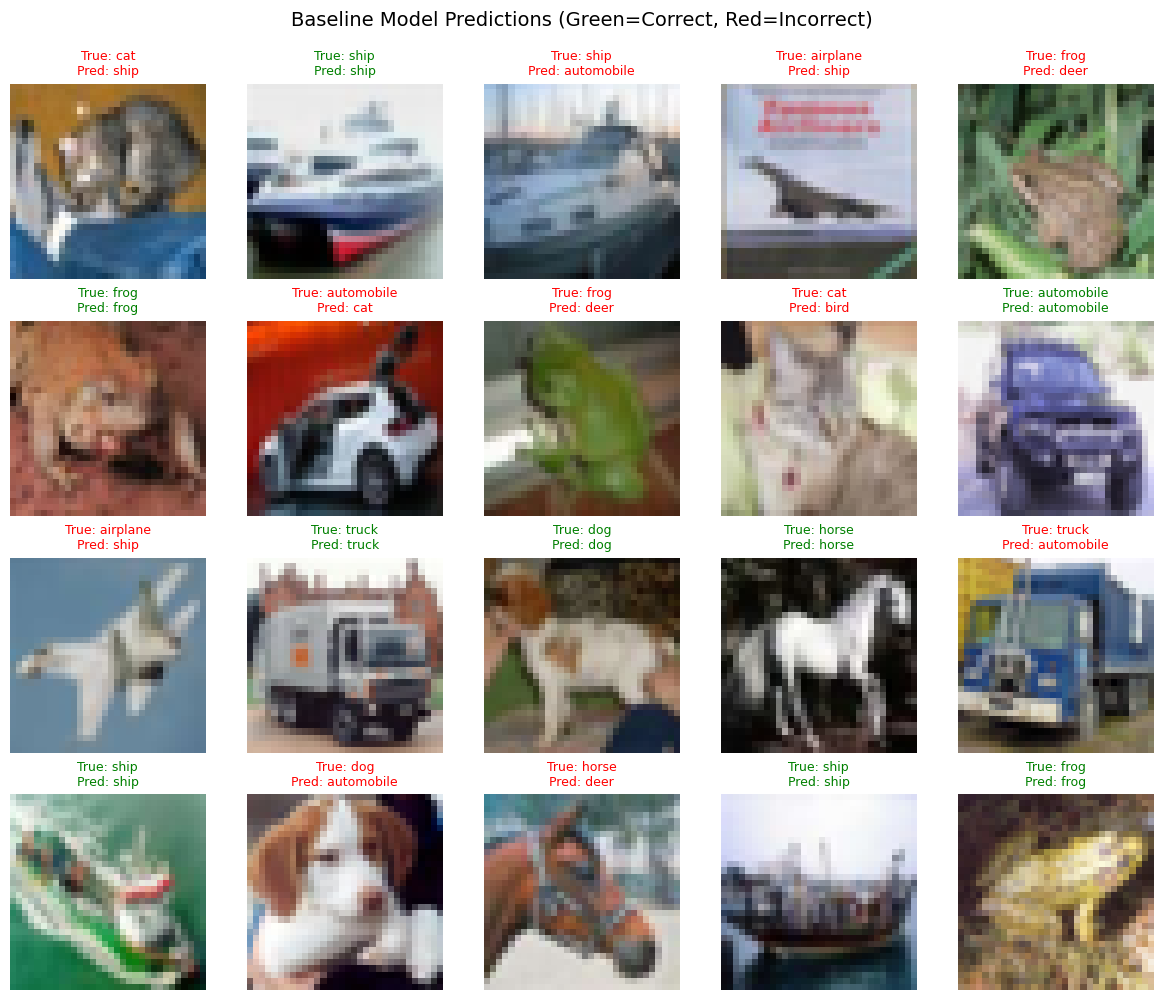

In [9]:
# Make predictions on test set
predictions = baseline_model.predict(x_test_normalized[:20], verbose=0)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = y_test[:20].flatten()

# Visualize predictions
fig, axes = plt.subplots(4, 5, figsize=(12, 10))
axes = axes.flatten()

for i in range(20):
    axes[i].imshow(x_test[i])
    axes[i].axis('off')
    
    # Color code: green for correct, red for incorrect
    color = 'green' if predicted_classes[i] == true_classes[i] else 'red'
    axes[i].set_title(f"True: {class_names[true_classes[i]]}\n"
                      f"Pred: {class_names[predicted_classes[i]]}", 
                      color=color, fontsize=9)

plt.suptitle('Baseline Model Predictions (Green=Correct, Red=Incorrect)', fontsize=14, y=0.995)
plt.tight_layout()
plt.show()

### 2.8 Visualize Predictions

Let's see how the model performs on random test images.

In [8]:
# Evaluate on test set
test_loss, test_accuracy = baseline_model.evaluate(x_test_normalized, y_test_oh, verbose=0)

print("="*50)
print("BASELINE MODEL - FINAL RESULTS")
print("="*50)
print(f"Test Accuracy:  {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"Test Loss:      {test_loss:.4f}")
print(f"Total Parameters: {baseline_model.count_params():,}")
print("="*50)

BASELINE MODEL - FINAL RESULTS
Test Accuracy:  0.4697 (46.97%)
Test Loss:      1.4933
Total Parameters: 402,250


### 2.7 Evaluate on Test Set

Final evaluation on unseen test data to get unbiased performance metrics.

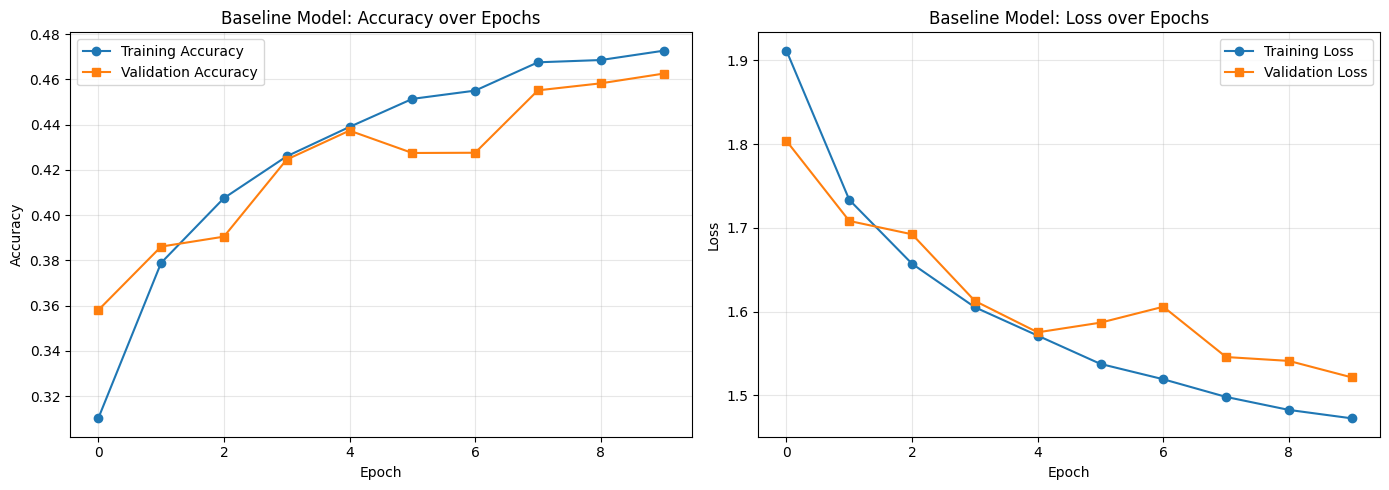

In [7]:
# Plot training history
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot accuracy
ax1.plot(history_baseline.history['accuracy'], label='Training Accuracy', marker='o')
ax1.plot(history_baseline.history['val_accuracy'], label='Validation Accuracy', marker='s')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.set_title('Baseline Model: Accuracy over Epochs')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot loss
ax2.plot(history_baseline.history['loss'], label='Training Loss', marker='o')
ax2.plot(history_baseline.history['val_loss'], label='Validation Loss', marker='s')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.set_title('Baseline Model: Loss over Epochs')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 2.6 Visualize Training History

Plotting training and validation metrics to identify:
- **Convergence**: Are loss and accuracy improving?
- **Overfitting**: Is validation performance worse than training?
- **Stability**: Are the curves smooth or erratic?

In [6]:
# Train baseline model
history_baseline = baseline_model.fit(
    x_train_normalized, y_train_oh,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3101 - loss: 1.9117 - val_accuracy: 0.3580 - val_loss: 1.8040
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3789 - loss: 1.7336 - val_accuracy: 0.3861 - val_loss: 1.7084
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4075 - loss: 1.6572 - val_accuracy: 0.3905 - val_loss: 1.6924
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4260 - loss: 1.6053 - val_accuracy: 0.4246 - val_loss: 1.6128
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4390 - loss: 1.5714 - val_accuracy: 0.4374 - val_loss: 1.5754
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4514 - loss: 1.5376 - val_accuracy: 0.4275 - val_loss: 1.5869
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4551 - loss: 1.5193 - val_accuracy: 0.4276 - val_loss: 1.6059
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4676 - loss: 1.4982 - val_accuracy: 0.

### 2.5 Train the Model

Training with **validation split** to monitor overfitting:
- **Training set**: 80% of training data (40,000 samples)
- **Validation set**: 20% of training data (10,000 samples)
- **Test set**: Separate 10,000 samples (not used during training)

**Parameters**:
- Epochs: 10 (may stop early if overfitting is observed)
- Batch size: 64 (good balance between speed and stability)
- Validation split: 0.2 (20% for validation)

In [5]:
baseline_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

### 2.4 Compile the Model

**Configuration**:
- **Optimizer**: Adam (adaptive learning rate)
- **Loss**: Categorical cross-entropy (for multi-class classification)
- **Metrics**: Accuracy (percentage of correct predictions)

### 2.3 Parameter Count Analysis

From the model summary above:
- **Layer 1 (hidden1)**: (3,072 × 128) + 128 bias = **393,344 parameters**
- **Layer 2 (hidden2)**: (128 × 64) + 64 bias = **8,256 parameters**
- **Output layer**: (64 × 10) + 10 bias = **650 parameters**
- **Total**: ~402K parameters

**Key observation**: The first dense layer dominates the parameter count because it connects every input pixel to every neuron. This is computationally expensive and prone to overfitting.

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Build baseline model
baseline_model = Sequential([
    Flatten(input_shape=(32, 32, 3)),  # Convert 32×32×3 to 3072 features
    Dense(128, activation='relu', name='hidden1'),
    Dense(64, activation='relu', name='hidden2'),
    Dense(10, activation='softmax', name='output')
], name='Baseline_Dense')

baseline_model.summary()

/home/cris/Documents/College/eight/arep/ml_bootcamp/ml_env/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2026-02-07 22:33:16.931509: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "Baseline_Dense"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden1 (Dense)                 │ (None, 128)            │       393,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 402,250 (1.53 MB)

 Trainable params: 402,250 (1.53 MB)

 Non-trainable params: 0 (0.00 B)

### 2.2 Build the Baseline Model

**Architecture**:
- **Input**: 32×32×3 = 3,072 features (flattened image)
- **Flatten Layer**: Converts 3D image to 1D vector
- **Hidden Layer 1**: 128 neurons with ReLU activation
- **Hidden Layer 2**: 64 neurons with ReLU activation  
- **Output Layer**: 10 neurons with softmax activation (one per class)

**Why this architecture?**
- **Flatten**: Required to convert 2D/3D spatial data to 1D for dense layers
- **ReLU activation**: Prevents vanishing gradients, faster training than sigmoid
- **Hidden layers**: 128 → 64 creates a funnel to compress information
- **Softmax output**: Produces probability distribution over 10 classes

In [3]:
from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot encoding for categorical cross-entropy
# Label 3 becomes [0,0,0,1,0,0,0,0,0,0]
y_train_oh = to_categorical(y_train, 10)
y_test_oh = to_categorical(y_test, 10)

print(f"Original label shape: {y_train.shape}")
print(f"One-hot encoded shape: {y_train_oh.shape}")
print(f"\nExample - Original label: {y_train[0][0]}")
print(f"One-hot encoded: {y_train_oh[0]}")

Original label shape: (50000, 1)
One-hot encoded shape: (50000, 10)

Example - Original label: 6
One-hot encoded: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


### 2.1 Prepare Labels for Categorical Classification

## Task 3: Convolutional Architecture Design
*To be implemented: Custom CNN architecture*

## Task 4: Controlled Experiments
*To be implemented: Systematic exploration of one architectural aspect*

## Task 5: Interpretation and Reasoning
*To be completed: Analysis of results and architectural decisions*